Nancy Thomas

In [16]:
from datascience import *
import numpy as np
import matplotlib  #plotting library
matplotlib.use('Agg', warn=False)   #this defines the backend
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight') 

For my second question, I am going to use a ninety percent confidence interval to estimate the proportion of intraracial homicides and then compare this to the true proportion of intraracial homicides. For this question, I first selected a random sample to work with, and used the bootstrapping method to find the confidence interval. To get more interesting results, I split the data by victim race and then ran the same test to find the ninety percent confidence interval for the true proportion of intraracial homicides within each race. I compared this to the true parameter. This is not a statistic that I am particularly informed on, and so my hypothesis was that the proportion of intraracial homicides was about 0.5 and that there would not be much variation when I split that data according to race.

In [17]:
homicides = Table().read_table('nancy_data_set.csv')

In [18]:
# In order to generate a 90% confidence interval, I need to first randomly select a sample without replacement
# I will pretend as if this is all the data I have, and later compare the 90% confidence interval that I generate
# for the proportion of intraracial homicides to the true population value
my_sample = homicides.sample(500, with_replacement=False)

In [19]:
# This cell defines a function that takes a sample and number and returns an array of bootstapped proportions of intraracial homicides
def bootstrap_proportion(sample, numBootstrap):
    race = sample.select('Victim Race','Perpetrator Race').where('Perpetrator Race', are.not_equal_to('Unknown')).where('Victim Race', are.not_equal_to('Unknown'))
    # I select out the homicides in which the race of the victim and perpetrator are unknown
    proportions = make_array()
    for i in np.arange(numBootstrap):
        bootstrap_sample = race.sample()
        resampled_prop = np.count_nonzero(bootstrap_sample.column('Victim Race') == bootstrap_sample.column('Perpetrator Race'))/len(bootstrap_sample.column(0))
        proportions = np.append(proportions, resampled_prop)
    return proportions

In [20]:
bootstrap_results = bootstrap_proportion(my_sample,1000)

In [21]:
left = percentile(5, bootstrap_results) # 5% of the bootrapped proportions are below this value
right = percentile (95, bootstrap_results) # 95% of the bootstrapped proportions are below this value

In [22]:
print('I am 90% confident that the true proportion of muders commited in which the victim and perpetrator are of the same race is between ' + str(left) + ' and ' + str(right) + '.')

I am 90% confident that the true proportion of muders commited in which the victim and perpetrator are of the same race is between 0.79754601227 and 0.861963190184.


In [23]:
# this cell calculated the true proportion of intraracial homicides in the population of 2014 homicides
no_u = homicides.where('Perpetrator Race', are.not_equal_to('Unknown')).where('Victim Race', are.not_equal_to('Unknown'))
parameter = np.count_nonzero(no_u.column('Victim Race') == no_u.column('Perpetrator Race'))/len(no_u.column('Victim Race'))
print('The true proportion of muders commited in which the victim and perpetrator are of the same race is ' + str(parameter) + '.')

The true proportion of muders commited in which the victim and perpetrator are of the same race is 0.8450413223140496.


In order to better visualize this result, I will plot the distribution of sample proportions in a histogram and show the ninety percent confidence interval (yellow) and the true parameter (red). I will only do this for the aggregate data, as the distribution would appear visually similar when divided by race.

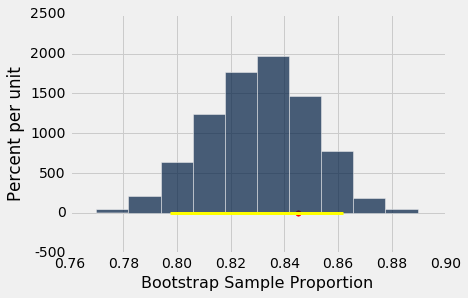

In [24]:
boot_tab = Table().with_column('Bootstrap Sample Proportion', bootstrap_results)
boot_tab.hist()
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(parameter, 0, color='red', s=30)

This value is inside of my 90% confidence interval, which was obtained using the bootstrapping method, as expected.

In [25]:
# This cell finds the 90% confidence interval and the true proportion of the popuation for the data when split but victim race

groups = np.array(['White','Black','Asian/Pacific Islander', 'Native American/Alaska Native'])
samp_size = np.array([500, 500, 100, 100])
# I used smaller samples for Asian and Native American populations because if I used 500, that would be more than the total number of homicides from either of these groups in 2014
i = 0
par_arr = make_array()
while i < len(groups):
    p = homicides.where('Victim Race', are.equal_to(groups[i]))
    p_sample = p.sample(samp_size[i], with_replacement=False)
    p_results = bootstrap_proportion(p_sample,1000)
    left_p = percentile(5, p_results)
    right_p = percentile (95, p_results)
    print('I am 90% confident that the true proportion of muders committed with ' + str(groups[i]) + ' vicitms and ' + str(groups[i]) + ' perpetrators is between ' + str(left_p) + ' and ' + str(right_p) + '.')
    p_parameter = np.count_nonzero(p.where('Perpetrator Race', are.not_equal_to('Unknown')).column('Victim Race') == p.where('Perpetrator Race', are.not_equal_to('Unknown')).column('Perpetrator Race'))/len(p.where('Perpetrator Race', are.not_equal_to('Unknown')).column('Victim Race'))
    par_arr = np.append(par_arr, p_parameter)
    print('The true proportion of muders committed with ' + str(groups[i]) + ' vicitms and ' + str(groups[i]) + ' perpetrators is ' + str(p_parameter) + '.')
    print()
    i = i + 1

I am 90% confident that the true proportion of muders committed with White vicitms and White perpetrators is between 0.803526448363 and 0.866498740554.
The true proportion of muders committed with White vicitms and White perpetrators is 0.8296818441607925.

I am 90% confident that the true proportion of muders committed with Black vicitms and Black perpetrators is between 0.853242320819 and 0.914675767918.
The true proportion of muders committed with Black vicitms and Black perpetrators is 0.8834370512206797.

I am 90% confident that the true proportion of muders committed with Asian/Pacific Islander vicitms and Asian/Pacific Islander perpetrators is between 0.466666666667 and 0.653333333333.
The true proportion of muders committed with Asian/Pacific Islander vicitms and Asian/Pacific Islander perpetrators is 0.5182926829268293.

I am 90% confident that the true proportion of muders committed with Native American/Alaska Native vicitms and Native American/Alaska Native perpetrators is b

It is interesting to note that for homices with white or black victims, interracial killing are much more rare than with homicides with Asian/Pacific Islander or Native American/Alaskan Native victims. Since homicides with a black or white victim take up a disproportionate number of homicides in 2014, the overall results (not broken up by race) follow similar trends to those seen with the black or white victims. Below, I plotted the intraracial homicide rates when split up by race, which I think is easier to visualize.

It seems that a lot of this disparity can be attributed to geographical segregation among different races. I looked at the New York Times' article, 'Mapping Segregation' and noticed that for most cities, the geographical separation between people of different races, which is what the article intended to show, was more extreme for black and white people than for people of other races. I know that a lot of crime occurs between people who live or spend a lot of their time in close proximity to one another. Thus, this physical separation could be a reason why interracial homicide rates are relatively low, and the more extreme physical separation of some racial groups relative to others could be a contributer to different rates of interracial homicides amongst different racial groups.

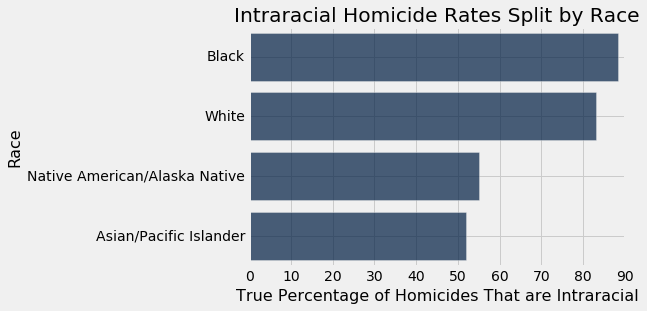

In [27]:
# This cell plots the true intraracial homicide percentages in a bar graph, which makes it easier to visualize
par_table = Table().with_columns('Race', groups, 'True Percentage of Homicides That are Intraracial', par_arr * 100).sort(1, descending = True)
par_table.barh('Race','True Percentage of Homicides That are Intraracial')
plots.title('Intraracial Homicide Rates Split by Race')

This bar graph provides a visualization of the analysis above.